In [14]:
# http://www.riteh.uniri.hr/~istajduh/projects/kneeMRI/data/volumetric_data/vol01.7z
import pickle
import os, sys, glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

# directory where the volumetric data is located
volumetric_data_dir = '../data/kneeMRI/volumetric_data'

# path to metadata csv file
metadata_csv_path = '../data/kneeMRI/metadata.csv'

# names=True loads the interprets the first row of csv file as column names
# 'i4' = 4 byte signed integer, 'U20' = unicode max 20 char string
metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True, 
    dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20') 

# print('Column names:')
# print(metadata.dtype.names)
pd.read_csv(metadata_csv_path)

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,329637,8,0,1,139,184,14,74,72,3,329637-8.pck
1,390116,9,0,0,113,105,10,83,98,6,390116-9.pck
2,404663,8,1,1,120,117,15,101,115,2,404663-8.pck
3,406320,9,0,0,117,124,12,91,80,3,406320-9.pck
4,412857,8,0,1,122,105,14,83,98,4,412857-8.pck
...,...,...,...,...,...,...,...,...,...,...,...
912,1027212,5,1,1,113,127,16,101,99,3,1027212-5.pck
913,1028019,5,1,1,105,102,14,95,100,3,1028019-5.pck
914,1028028,5,0,0,118,84,15,100,100,2,1028028-5.pck
915,1028069,5,0,0,105,97,15,103,106,4,1028069-5.pck



Shape of volume "../data/kneeMRI/volumetric_data\329637-8.pck": (32, 320, 320)


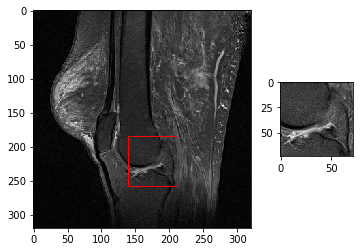

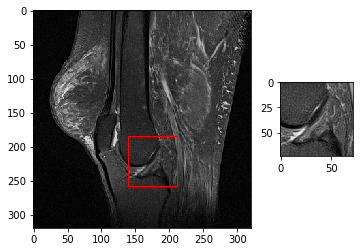

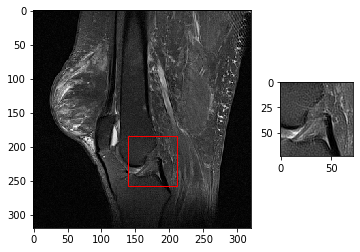

In [16]:

# Select all rows where examID == 502889
exams = metadata[metadata['examId'] == 329637]

for exam in exams:
    vol_data_file = exam['volumeFilename']

    vol_data_path = os.path.join(volumetric_data_dir, vol_data_file)

    # Load data from file
    with open(vol_data_path, 'rb') as file_handler: # Must use 'rb' as the data is binary
        volumetric_data = pickle.load(file_handler)
    
    print('\nShape of volume "%s":' % vol_data_path, volumetric_data.shape)
    
    # Get all roi slices from volume
    z_start = exam['roiZ']
    depth = exam['roiDepth']
    
    for z in range(z_start, z_start + depth):
    
        slice = volumetric_data[z, :, :]
        
        # Get roi dimensions
        x, y, w, h = [exam[attr] for attr in ['roiX', 'roiY', 'roiWidth', 'roiHeight']]
        
        # Extract ROI
        roi = slice[y:y+h, x:x+w]
        
        # Plot slice and roi
        figure = plt.figure()
        plot = plt.subplot2grid((1, 4), (0, 0), 1, 3) # This makes the slice plot larger than roi plot
        plot.add_patch(patch.Rectangle((x, y), w, h, fill=None, color='red'))
        plot.imshow(slice, cmap='gray')
        plot = plt.subplot2grid((1, 4), (0, 3), 1, 1)
        plot.imshow(roi, cmap='gray')
        
        plt.show()


In [5]:
import tensorflow as tf
import os, glob, sys

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, Dense

In [ ]:
data = nib.load(